# Problem Statement

**Food Delivery services like Zomato and Swiggy need to show the accurate time it will take to deliver your order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past.**

**To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.**


In [1]:
#Importatnt Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder ,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r'D:\Project2\ModularCoding1\notebook\data\finalTrain.csv')

In [3]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106  12-02-2022       21:55             22:10   
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

In [4]:
df.shape

(45584, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
df.describe().T

count       mean        std        min  \
Delivery_person_Age          43730.0  29.566911   5.815064  15.000000   
Delivery_person_Ratings      43676.0   4.633774   0.334744   1.000000   
Restaurant_latitude          45584.0  17.017948   8.185674 -30.905562   
Restaurant_longitude         45584.0  70.229684  22.885575 -88.366217   
Delivery_location_latitude   45584.0  17.465480   7.335562   0.010000   
Delivery_location_longitude  45584.0  70.844161  21.120578   0.010000   
Vehicle_condition            45584.0   1.023385   0.839055   0.000000   
multiple_deliveries          44591.0   0.744635   0.572510   0.000000   
Time_taken (min)             45584.0  26.293963   9.384298  10.000000   

                                   25%        50%        75%        max  
Delivery_person_Age          25.000000  30.000000  35.000000  50.000000  
Delivery_person_Ratings       4.500000   4.700000   4.900000   6.000000  
Restaurant_latitude          12.933284  18.551440  22.728163  30.914057  
Restaurant_longitude         73.170000  75.897963  78.044095  88.433452  
Delivery_location_latitude   12.988453  18.633934  22.785049  31.054057  
Delivery_location_longitude  73.280000  76.002574  78.107044  88.563452  
Vehicle_condition             0.000000   1.000000   2.000000   3.000000  
multiple_deliveries           0.000000   1.000000   1.000000   3.000000  
Time_taken (min)             19.000000  26.000000  32.000000  54.000000

In [8]:
#Getting Unique Values From Dataset 
for column in df.columns:
    print("{} column from dataset contain {} unique value".format(column,df[column].nunique()))
    if df[column].nunique() < 8:
        print("Total unique values in {} column in dataset are {}".format(column , df[column].unique()))
    print('*' * 35)
    print()
    

ID column from dataset contain 45584 unique value
***********************************

Delivery_person_ID column from dataset contain 1320 unique value
***********************************

Delivery_person_Age column from dataset contain 22 unique value
***********************************

Delivery_person_Ratings column from dataset contain 28 unique value
***********************************

Restaurant_latitude column from dataset contain 657 unique value
***********************************

Restaurant_longitude column from dataset contain 518 unique value
***********************************

Delivery_location_latitude column from dataset contain 4373 unique value
***********************************

Delivery_location_longitude column from dataset contain 4373 unique value
***********************************

Order_Date column from dataset contain 44 unique value
***********************************

Time_Orderd column from dataset contain 176 unique value
******************************

In [9]:
features = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage = []

for column in df.columns:
    features.append(column)
    dtypes.append(df[column].dtype)
    count.append(len(df[column]))
    unique.append(df[column].nunique())
    missing.append(df[column].isnull().sum())
    missing_percentage.append(round((df[column].isnull().sum())/(len(df[column])),4)*100)
    

dataframe = pd.DataFrame(
    {"Feature" : features ,
     "count" : count,
    "dtypes" :dtypes,
    "unique" : unique ,
    "missing" : missing ,
    "missing_percentage" : missing_percentage}
)
dataframe.set_index('Feature')
    

count   dtypes  unique  missing  \
Feature                                                        
ID                           45584   object   45584        0   
Delivery_person_ID           45584   object    1320        0   
Delivery_person_Age          45584  float64      22     1854   
Delivery_person_Ratings      45584  float64      28     1908   
Restaurant_latitude          45584  float64     657        0   
Restaurant_longitude         45584  float64     518        0   
Delivery_location_latitude   45584  float64    4373        0   
Delivery_location_longitude  45584  float64    4373        0   
Order_Date                   45584   object      44        0   
Time_Orderd                  45584   object     176     1731   
Time_Order_picked            45584   object     193        0   
Weather_conditions           45584   object       6      616   
Road_traffic_density         45584   object       4      601   
Vehicle_condition            45584    int64       4        0   
Type_of_order                45584   object       4        0   
Type_of_vehicle              45584   object       4        0   
multiple_deliveries          45584  float64       4      993   
Festival                     45584   object       2      228   
City                         45584   object       3     1200   
Time_taken (min)             45584    int64      45        0   

                             missing_percentage  
Feature                                          
ID                                         0.00  
Delivery_person_ID                         0.00  
Delivery_person_Age                        4.07  
Delivery_person_Ratings                    4.19  
Restaurant_latitude                        0.00  
Restaurant_longitude                       0.00  
Delivery_location_latitude                 0.00  
Delivery_location_longitude                0.00  
Order_Date                                 0.00  
Time_Orderd                                3.80  
Time_Order_picked                          0.00  
Weather_conditions                         1.35  
Road_traffic_density                       1.32  
Vehicle_condition                          0.00  
Type_of_order                              0.00  
Type_of_vehicle                            0.00  
multiple_deliveries                        2.18  
Festival                                   0.50  
City                                       2.63  
Time_taken (min)                           0.00

Few columns from dataset are not important .We have to drop them else they may increase complexity

In [10]:
df.drop(columns=['ID'],inplace=True)

In [11]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

In [12]:
#We will convert Datatype of Order_Date column into Datetime 
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

C:\Users\pramod.khavare\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pramod.khavare\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pramod.khavare\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pramod.khavare\AppData\Roaming\Python\Python310\site-packages\panda

In [13]:
df['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [14]:
#We will store Date Year and Day column in diffrent diffrent column

df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

In [15]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Order_Date Time_Orderd Time_Order_picked  ...  \
0                    78.116106 2022-12-02       21:55             22:10  ...   
1                    76.347589 2022-02-13       14:55             15:05  ...   
2                    74.006619 2022-04-03       17:30             17:40  ...   
3                    75.829346 2022-02-13       09:20             09:30  ...   
4                    80.502929 2022-02-14       19:50             20:05  ...   

  Vehicle_condition Type_of_order  Type_of_vehicle multiple_deliveries  \
0                 2         Snack       motorcycle                 3.0   
1                 1          Meal       motorcycle                 1.0   
2                 1        Drinks          scooter                 1.0   
3                 0        Buffet       motorcycle                 0.0   
4                 1         Snack          scooter                 1.0   

  Festival           City Time_taken (min)  Year  Month  Day  
0       No  Metropolitian               46  2022     12    2  
1       No  Metropolitian               23  2022      2   13  
2       No  Metropolitian               21  2022      4    3  
3       No  Metropolitian               20  2022      2   13  
4       No  Metropolitian               41  2022      2   14  

[5 rows x 22 columns]

In [16]:
#Remove Date column from dataset 
df.drop(columns=['Order_Date'] , inplace=True)

In [17]:
df.dropna(subset=['Time_Orderd'] ,inplace=True)  #subset will help to remove na values from row of perticuler column

In [18]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12:50',

In [19]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_26936\3853550708.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')


In [20]:


def extract(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][0:2]
        
    except IndexError :
        return '00:00'
    
df['Time_Orderd'] = df['Time_Orderd'].apply(extract)

In [21]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0:45', '09:45', '08:40',
       '0:95', '17:25', '19:45', '19:10', '10:55', '21:40', '0:79',
       '16:45', '11:30', '15:10', '22:45', '22:10', '20:45', '22:50',
       '17:55', '09:25', '20:15', '22:25', '22:40', '23:50', '15:25',
       '10:20', '20:55', '10:40', '15:55', '20:10', '12:10', '15:30',
       '10:35', '21:10', '20:50', '12:35', '0:87', '23:40', '18:15',
       '18:20', '11:45', '12:45', '23:30', '10:50', '21:25', '10:10',
       '17:50', '22:20', '12:40', '23:55', '10:25', '08:45', '23:45',
       '19:55', '22:15', '23:10', '09:15', '18:25', '18:45', '16:50',
       '00:00', '14:20', '10:15', '08:50', '0:37', '17:45', '16:35',
       '08:30', '21:45', '19:40', '14:50', '18:10', '12:20', '12:50',
       '09:10', '12:30', 

In [22]:
df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'] ,format='%H:%M:%S' ,errors='ignore')

In [23]:
df['TimeOrder_Hour'] = df['Time_Orderd'].str.split(':' , expand=True)[0]


df['TimeOrder_Hour']=df['TimeOrder_Hour'].str.replace('0' ,'00')
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')


In [24]:

df['TimeOrder_Min'] = df['Time_Orderd'].str.split(':' ,expand=True)[1]

df['TimeOrder_Min']=df['TimeOrder_Min'].str.replace('0' ,'00')

df['TimeOrder_Min'] = df['TimeOrder_Min'].astype('int32')

In [25]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions  ... Type_of_vehicle  multiple_deliveries Festival  \
0                Fog  ...      motorcycle                  3.0       No   
1             Stormy  ...      motorcycle                  1.0       No   
2         Sandstorms  ...         scooter                  1.0       No   
3         Sandstorms  ...      motorcycle                  0.0       No   
4                Fog  ...         scooter                  1.0       No   

            City  Time_taken (min)  Year Month  Day  TimeOrder_Hour  \
0  Metropolitian                46  2022    12    2              21   
1  Metropolitian                23  2022     2   13              14   
2  Metropolitian                21  2022     4    3              17   
3  Metropolitian                20  2022     2   13               9   
4  Metropolitian                41  2022     2   14              19   

   TimeOrder_Min  
0             55  
1             55  
2            300  
3            200  
4            500  

[5 rows x 23 columns]

In [26]:
df.drop(columns=['Time_Orderd'] ,inplace=True)

In TimeOrder_Hour:
1. 7AM - 12PM  :-Breakfast
2. 12Pm - 15PM :-Lunch
3. 15PM -17PM  :-After Lunch
4. 17PM - 19PM :-Evening Snacks
5. 19PM -24AM  :-Dinner

Preprocessing of column :Time_Order_picked

In [27]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '19:50', '19:25', '0.458333333',
       '19:15', '16:55', '11:40', '15:15', '22:55', '22:25', '20:55',
       '23:05', '0.75', '0.958333333', '09:40', '20:20', '22:35',
       '0.916666667', '23:55', '15:40', '10:30', '0.875', '10:50',
       '16:05', '20:15', '12:15', '15:45', '22:15', '10:45', '24:05:00',
       '21:25', '12:45', '21:15', '18:20', '18:25', '11:50', '12:50',
       '10:55', '21:40', '10:20', '17:55', '23:50', '12:55', '24:10:00',
       '10:40', '0.375', '20:45', '0.833333333', '23:15', '18:35',
       '22:20', '21:05', '0.708333333', '24:15:00', '21:20', '14:35',
       '10:25', '09:05', '16:50', '08:40', '23:40', '21:50', '19:55',
       '0.625', '10:35', '0

In [28]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.',':')

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_26936\3274878804.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.',':')


In [29]:
def extract(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][0:2]
        
    except IndexError :
        return '00:00'
    
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract)

In [30]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '19:50', '19:25', '0:45', '19:15',
       '16:55', '11:40', '15:15', '22:55', '22:25', '20:55', '23:05',
       '0:75', '0:95', '09:40', '20:20', '22:35', '0:91', '23:55',
       '15:40', '10:30', '0:87', '10:50', '16:05', '20:15', '12:15',
       '15:45', '22:15', '10:45', '24:05', '21:25', '12:45', '21:15',
       '18:20', '18:25', '11:50', '12:50', '10:55', '21:40', '10:20',
       '17:55', '23:50', '12:55', '24:10', '10:40', '0:37', '20:45',
       '0:83', '23:15', '18:35', '22:20', '21:05', '0:70', '24:15',
       '21:20', '14:35', '10:25', '09:05', '16:50', '08:40', '23:40',
       '21:50', '19:55', '0:62', '10:35', '09:25', '17:20', '19:30',
       '17:25', '20:10', '00:

In [31]:
df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'] ,format='%H:%M:%S' ,errors='ignore')

In [32]:
#Order Hour
df['Time_Order_picked_hour'] = df['Time_Order_picked'].str.split(':' , expand=True)[0]


df['Time_Order_picked_hour']=df['Time_Order_picked_hour'].astype('int32')



In [33]:
#Order Min
df['Time_Order_picked_min'] = df['Time_Order_picked'].str.split(':' , expand=True)[1]
df['Time_Order_picked_min'] = df['Time_Order_picked_min'].astype('int32')

#### Extract city from delivery_person_id:-

In [34]:
df['Delivery_city'] = df['Delivery_person_ID'].str.split('RES' ,expand=True)[0]

In [35]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Order_picked Weather_conditions  \
0                    78.116106             22:10                Fog   
1                    76.347589             15:05             Stormy   
2                    74.006619             17:40         Sandstorms   
3                    75.829346             09:30         Sandstorms   
4                    80.502929             20:05                Fog   

  Road_traffic_density  ...           City Time_taken (min)  Year  Month Day  \
0                  Jam  ...  Metropolitian               46  2022     12   2   
1                 High  ...  Metropolitian               23  2022      2  13   
2               Medium  ...  Metropolitian               21  2022      4   3   
3                  Low  ...  Metropolitian               20  2022      2  13   
4                  Jam  ...  Metropolitian               41  2022      2  14   

  TimeOrder_Hour  TimeOrder_Min  Time_Order_picked_hour  \
0             21             55                      22   
1             14             55                      15   
2             17            300                      17   
3              9            200                       9   
4             19            500                      20   

   Time_Order_picked_min  Delivery_city  
0                     10            DEH  
1                      5            KOC  
2                     40           PUNE  
3                     30           LUDH  
4                      5            KNP  

[5 rows x 25 columns]

In [36]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [37]:
df['Restaurant_latitude'].dtype

dtype('float64')

#### Handling missing values in Delivery Person Rating

In [38]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [39]:
import numpy as np

In [40]:
#Filling null value in Rating 
rating_map = np.round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].agg('mean'),1).to_dict()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [41]:
df['Delivery_person_Ratings'].isnull().sum()


0

### Visualization:-

In [42]:
import folium
folium.Map(title = 'cartodb positron')

In [43]:
import folium
folium.Map(tiles= 'cartodb positron')

In [44]:
import plotly.express as px
data1 = df.copy()
data1.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             214
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken (min)                  0
Year                              0
Month                             0
Day                               0
TimeOrder_Hour                    0
TimeOrder_Min                     0
Time_Order_picked_hour            0
Time_Order_picked_min             0
Delivery_city                     0
dtype: int64

In [45]:
data1.dropna(axis=0 , how = 'any' , thresh=None , subset= None ,inplace=True)
color_scale = [(0, 'orange'),(1,'red')]
fig = px.scatter_mapbox(
    data1 ,lat='Restaurant_latitude',
    lon = 'Restaurant_longitude',
    color_continuous_scale= color_scale ,
    zoom=8,
    height=1000,
    width=1000
)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin={'r':0 ,'t':0 ,'l':0,'b':0})
fig.show()


In [46]:
#Convert negative latitude into positive latitude

df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [47]:
data1.dropna(axis=0 , how = 'any' , thresh=None , subset= None ,inplace=True)
color_scale = [(0, 'orange'),(1,'red')]
fig = px.scatter_mapbox(
    df ,lat='Restaurant_latitude',
    lon = 'Restaurant_longitude',
    color_continuous_scale= color_scale ,
    zoom=8,
    height=1000,
    width=1000
)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin={'r':0 ,'t':0 ,'l':0,'b':0})
fig.show()

In [48]:
#Calulate distance in between two point on earth (use Haversine Formula)
import math 
def distance(lat1 ,long1 ,lat2 ,long2):
    #convert latitude and langitude in radian
    lat1 ,long1 ,lat2 ,long2  = map(math.radians, [lat1 ,long1 ,lat2 ,long2])
    
    #Haversine Formula
    dlat =lat2 - lat1
    dlon =long2 - long1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) *math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a) , math.sqrt(1-a))
    R = 6371.0  #Earth radius in km
    
    dist = R * c
    
    return dist



In [49]:
def distance_numpy( df, lat1, lon1,lat2, lon2 ):
        p = np.pi/180
        a = 0.5 - np.cos((df[lat2]-df[lat1])*p)/2 + np.cos(df[lat1]*p) * np.cos(df[lat2]*p) * (1-np.cos((df[lon2]-df[lon1])*p))/2
        abc = 12734 * np.arccos(np.sort(a))
        print(abc)

In [50]:
df.iloc[1]

Delivery_person_ID             KOCRES16DEL01
Delivery_person_Age                     21.0
Delivery_person_Ratings                  4.7
Restaurant_latitude                10.003064
Restaurant_longitude               76.307589
Delivery_location_latitude         10.043064
Delivery_location_longitude        76.347589
Time_Order_picked                      15:05
Weather_conditions                    Stormy
Road_traffic_density                    High
Vehicle_condition                          1
Type_of_order                           Meal
Type_of_vehicle                   motorcycle
multiple_deliveries                      1.0
Festival                                  No
City                           Metropolitian
Time_taken (min)                          23
Year                                    2022
Month                                      2
Day                                       13
TimeOrder_Hour                            14
TimeOrder_Min                             55
Time_Order

In [51]:
df['Distance'] = df.apply(lambda x : distance(x['Restaurant_latitude'] , x['Restaurant_longitude'] , x['Delivery_location_latitude'] ,x['Delivery_location_longitude']),axis=1)


In [52]:
df['Distance']

0        10.280582
1         6.242319
2        13.787860
3         2.930258
4        19.396618
           ...    
45579     1.489846
45580    11.007735
45581     4.657195
45582     6.232393
45583    12.074396
Name: Distance, Length: 43853, dtype: float64

In [53]:
distance_numpy(df ,'Restaurant_latitude' ,'Restaurant_longitude' ,'Delivery_location_latitude' ,'Delivery_location_longitude')

[20002.52025706 20002.52025706 20002.52025706 ... 20002.48593765
 20002.48593765 20002.48593765]


In [54]:
df.groupby(['Restaurant_latitude' ,'Restaurant_longitude','Delivery_location_latitude' , 'Delivery_location_longitude'])['Distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [55]:
# order from restorent Restorent location == 0,0
df[(df['Restaurant_latitude']==9.957144) & (df['Restaurant_longitude']==76.296783)]

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
3187       KOCRES18DEL01                 29.0                      4.8   
4664       KOCRES18DEL03                 28.0                      4.9   
4881       KOCRES18DEL01                 25.0                      5.0   
5487       KOCRES18DEL01                 35.0                      4.3   
7929       KOCRES18DEL01                 33.0                      4.9   
8530       KOCRES18DEL01                 32.0                      4.6   
9766       KOCRES18DEL03                 21.0                      4.6   
9999       KOCRES18DEL03                 31.0                      4.0   
10722      KOCRES18DEL01                 28.0                      4.6   
11931      KOCRES18DEL03                 35.0                      4.7   
12249      KOCRES18DEL02                 39.0                      4.2   
13650      KOCRES18DEL01                 31.0                      4.2   
14176      KOCRES18DEL03                 25.0                      4.9   
15806      KOCRES18DEL01                 28.0                      4.2   
16481      KOCRES18DEL02                 20.0                      4.6   
16854      KOCRES18DEL02                 21.0                      4.6   
17456      KOCRES18DEL01                 34.0                      4.4   
17457      KOCRES18DEL02                 29.0                      4.6   
18104      KOCRES18DEL03                 30.0                      4.5   
24191      KOCRES18DEL01                 37.0                      4.6   
24457      KOCRES18DEL02                 36.0                      4.8   
26136      KOCRES18DEL03                 37.0                      4.9   
27401      KOCRES18DEL01                 24.0                      4.6   
30328      KOCRES18DEL01                 36.0                      5.0   
30848      KOCRES18DEL02                 28.0                      4.9   
32891      KOCRES18DEL01                 26.0                      5.0   
33614      KOCRES18DEL02                 28.0                      4.7   
34516      KOCRES18DEL02                 27.0                      4.6   
35216      KOCRES18DEL02                 29.0                      4.7   
37745      KOCRES18DEL02                 30.0                      4.9   
37862      KOCRES18DEL01                 20.0                      4.9   
38540      KOCRES18DEL03                 35.0                      3.7   
39532      KOCRES18DEL03                 32.0                      4.7   
39652      KOCRES18DEL01                 25.0                      4.6   
42225      KOCRES18DEL03                 22.0                      4.5   
42565      KOCRES18DEL02                 20.0                      5.0   
42627      KOCRES18DEL02                 38.0                      4.3   
44385      KOCRES18DEL01                 27.0                      5.0   
44836      KOCRES18DEL03                 35.0                      4.7   
44997      KOCRES18DEL02                 27.0                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
3187              9.957144             76.296783                   10.027144   
4664              9.957144             76.296783                   10.017144   
4881              9.957144             76.296783                   10.027144   
5487              9.957144             76.296783                    9.967144   
7929              9.957144             76.296783                    9.997144   
8530              9.957144             76.296783                   10.067144   
9766              9.957144             76.296783                   10.017144   
9999              9.957144             76.296783                   10.047144   
10722             9.957144             76.296783                    9.997144   
11931             9.957144             76.296783                    9.987144   
12249             9.957144             76.296783                   10.087144   
13650      

In [56]:
# What is the latitudes and longitudes of India?
# India is a vast country. Lying entirely in the Northern hemisphere
# the main land extends between latitudes 8°4'N and 37°6'N and longitudes 68°7'E and 97°25'E.
#So remove other rows

print(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] <8)].shape)
print(df[(df['Restaurant_latitude']>38)].shape)
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] <8).index]

(3509, 26)
(0, 26)


Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
43        AURGRES20DEL03                 25.0                      5.0   
59         VADRES09DEL01                 35.0                      4.8   
63         VADRES15DEL02                 24.0                      4.8   
67         BHPRES12DEL02                 20.0                      4.5   
127        VADRES04DEL01                 24.0                      4.9   
...                  ...                  ...                      ...   
45429     ALHRES010DEL02                 20.0                      4.6   
45485      ALHRES06DEL02                 28.0                      4.8   
45505   RANCHIRES03DEL01                 28.0                      4.6   
45527      BHPRES02DEL01                 38.0                      4.3   
45567   RANCHIRES02DEL02                 34.0                      4.2   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
43                     0.0                   0.0                        0.03   
59                     0.0                   0.0                        0.04   
63                     0.0                   0.0                        0.08   
67                     0.0                   0.0                        0.05   
127                    0.0                   0.0                        0.04   
...                    ...                   ...                         ...   
45429                  0.0                   0.0                        0.13   
45485                  0.0                   0.0                        0.13   
45505                  0.0                   0.0                        0.01   
45527                  0.0                   0.0                        0.07   
45567                  0.0                   0.0                        0.13   

       Delivery_location_longitude Time_Order_picked Weather_conditions  \
43                            0.03             22:25             Cloudy   
59                            0.04             16:05                Fog   
63                            0.08             22:15         Sandstorms   
67                            0.05             21:25                Fog   
127                           0.04             16:50                Fog   
...                            ...               ...                ...   
45429                         0.13             17:40                Fog   
45485                         0.13             19:45                Fog   
45505                         0.01             08:20                Fog   
45527                         0.07             17:20                Fog   
45567                         0.13             17:30             Stormy   

      Road_traffic_density  ...  Time_taken (min)  Year Month  Day  \
43                     Low  ...                15  2022     2   13   
59                  Medium  ...                16  2022     3   28   
63                     Low  ...                15  2022     3   25   
67                     Jam  ...                27  2022    11    2   
127                 Medium  ...                17  2022     3   30   
...                    ...  ...               ...   ...   ...  ...   
45429               Medium  ...                37  2022     2   16   
45485                  Jam  ...                34  2022     2   14   
45505                  Low  ...                19  2022     3   13   
45527               Medium  ...                39  2022     2   14   
45567               Medium  ...                48  2022     4    4   

      TimeOrder_Hour TimeOrder_Min  Time_Order_picked_hour  \
43                22           100                      22   
59                15            55                      16   
63                22           100                      22   
67                21           100                      21   
127               16            35                      16   
...              ...           ...        

In [57]:
#Drop above rows
df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] <8)].index)
df.shape


(40344, 26)

In [58]:
#Drop rows as per Latitude
df = df.drop(df[(df['Restaurant_latitude'] >37) & (df['Delivery_location_latitude'] >37)].index)
df.shape

(40344, 26)

In [59]:
#Drop rows as per Longitude
df = df.drop(df[(df['Restaurant_latitude'] >37) & (df['Delivery_location_latitude'] >37)].index)
df.shape

(40344, 26)

In [60]:
#Drop rows as per Longitude
df = df.drop(df[(df['Restaurant_longitude'] <68) & (df['Delivery_location_longitude'] <68)].index)
df.shape

(40344, 26)

In [61]:
df.shape

(40344, 26)

In [62]:
df[df['Distance']== df['Distance'].min()]

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
7401      LUDHRES04DEL01                 28.0                      4.8   
26576     LUDHRES04DEL01                 21.0                      4.5   
33057     LUDHRES04DEL01                 21.0                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
7401             30.914057              75.83982                   30.924057   
26576            30.914057              75.83982                   30.924057   
33057            30.914057              75.83982                   30.924057   

       Delivery_location_longitude Time_Order_picked Weather_conditions  \
7401                      75.84982             11:20             Stormy   
26576                     75.84982             09:20              Windy   
33057                     75.84982             11:05             Cloudy   

      Road_traffic_density  ...  Time_taken (min)  Year Month  Day  \
7401                  High  ...                16  2022     2   17   
26576                  Low  ...                13  2022     2   13   
33057                  Low  ...                16  2022    11    2   

      TimeOrder_Hour TimeOrder_Min  Time_Order_picked_hour  \
7401              11            15                      11   
26576              9           100                       9   
33057            100           500                      11   

       Time_Order_picked_min  Delivery_city  Distance  
7401                      20           LUDH  1.465067  
26576                     20           LUDH  1.465067  
33057                      5           LUDH  1.465067  

[3 rows x 26 columns]

In [63]:
print(df['Distance'].nunique())
df.groupby('Distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='Distance').head(3)

4355


Restaurant_latitude  Restaurant_longitude  \
Distance                                              
1.465067            30.914057             75.839820   
1.465123            30.905562             75.832841   
1.465140            30.902872             75.826808   

          Delivery_location_latitude  Delivery_location_longitude  
Distance                                                           
1.465067                   30.924057                    75.849820  
1.465123                   30.915562                    75.842841  
1.465140                   30.912872                    75.836808

In [64]:
df[df['Distance']==df['Distance'].min()]

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
7401      LUDHRES04DEL01                 28.0                      4.8   
26576     LUDHRES04DEL01                 21.0                      4.5   
33057     LUDHRES04DEL01                 21.0                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
7401             30.914057              75.83982                   30.924057   
26576            30.914057              75.83982                   30.924057   
33057            30.914057              75.83982                   30.924057   

       Delivery_location_longitude Time_Order_picked Weather_conditions  \
7401                      75.84982             11:20             Stormy   
26576                     75.84982             09:20              Windy   
33057                     75.84982             11:05             Cloudy   

      Road_traffic_density  ...  Time_taken (min)  Year Month  Day  \
7401                  High  ...                16  2022     2   17   
26576                  Low  ...                13  2022     2   13   
33057                  Low  ...                16  2022    11    2   

      TimeOrder_Hour TimeOrder_Min  Time_Order_picked_hour  \
7401              11            15                      11   
26576              9           100                       9   
33057            100           500                      11   

       Time_Order_picked_min  Delivery_city  Distance  
7401                      20           LUDH  1.465067  
26576                     20           LUDH  1.465067  
33057                      5           LUDH  1.465067  

[3 rows x 26 columns]

In [65]:
#Plot minimum distance
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
# folium.TileLayer('Stamen Terrain').add_to(m)
# folium.TileLayer('Stamen Toner').add_to(m)
# folium.TileLayer('Stamen Water Color').add_to(m)
# folium.TileLayer('cartodbpositron').add_to(m)
# folium.TileLayer('cartodbdark_matter').add_to(m)
# folium.LayerControl().add_to(m)
m

In [66]:
df.groupby('Distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']].max().sort_values(by='Distance').tail(1)


Restaurant_latitude  Restaurant_longitude  \
Distance                                               
20.969489            25.443994             81.860187   

           Delivery_location_latitude  Delivery_location_longitude  
Distance                                                            
20.969489                   25.583994                    82.000187

In [67]:
#Plot maximum distance
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994, 82.000187]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
# folium.TileLayer('Stamen Terrain').add_to(m)
# folium.TileLayer('Stamen Toner').add_to(m)
# folium.TileLayer('Stamen Water Color').add_to(m)
# folium.TileLayer('cartodbpositron').add_to(m)
# folium.TileLayer('cartodbdark_matter').add_to(m)
# folium.LayerControl().add_to(m)
m

In [68]:
data1.dropna(axis=0 , how = 'any' , thresh=None , subset= None ,inplace=True)
color_scale = [(0, 'orange'),(1,'red')]
fig = px.scatter_mapbox(
    df ,lat='Restaurant_latitude',
    lon = 'Restaurant_longitude',
    color_continuous_scale= color_scale ,
    zoom=8,
    height=1000,
    width=1000
)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin={'r':0 ,'t':0 ,'l':0,'b':0})
fig.show()

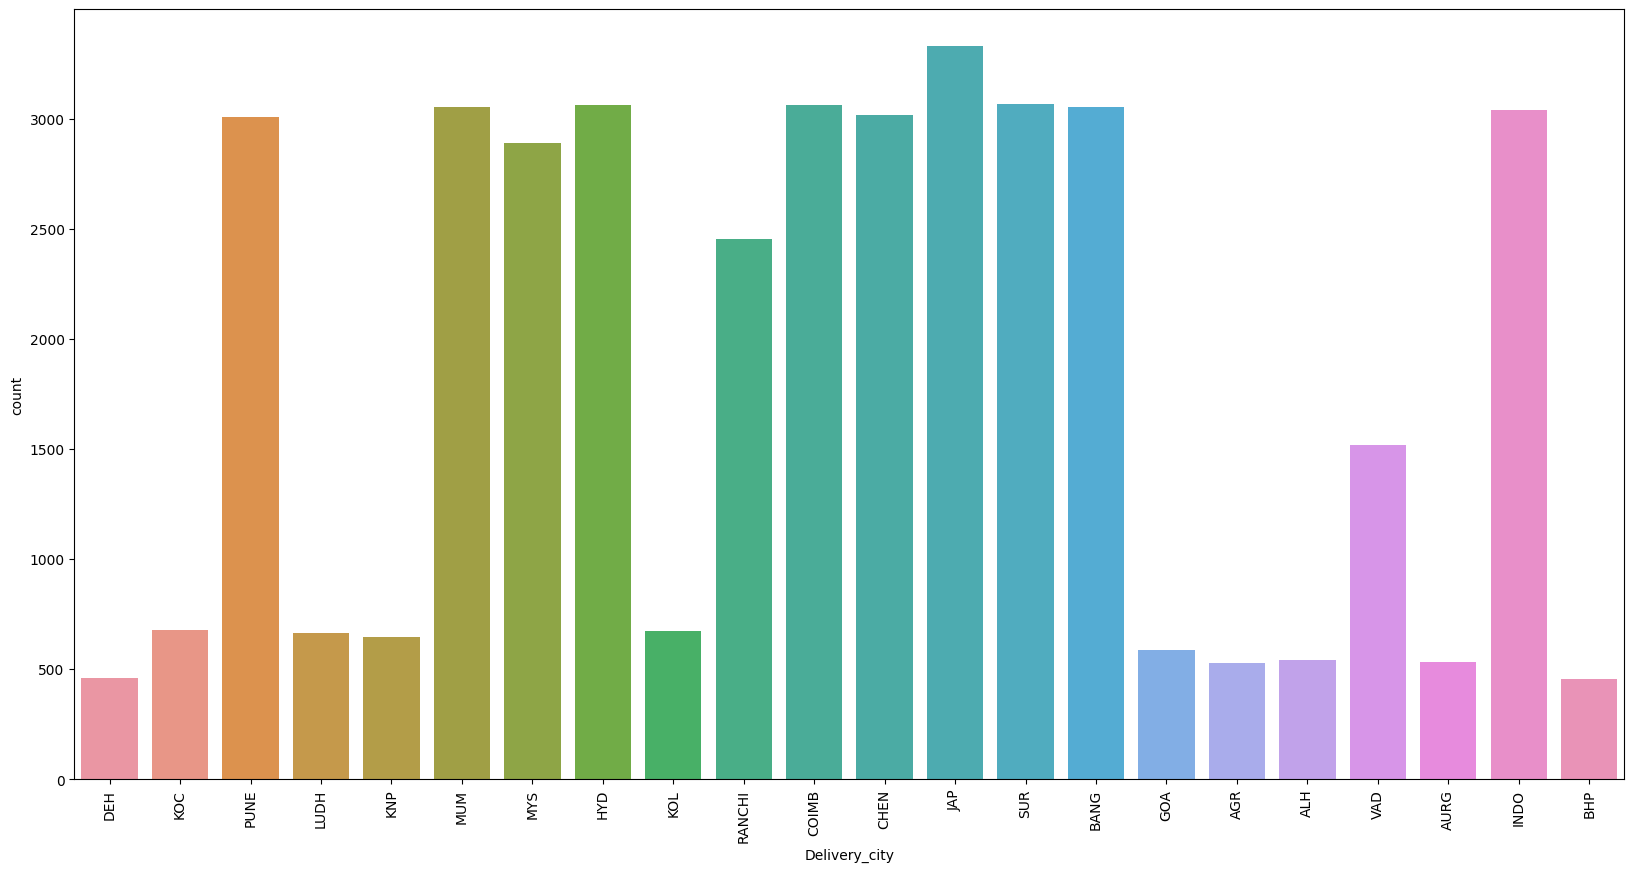

In [69]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Delivery_city'])
plt.xticks(rotation = 'vertical')
plt.show()

In [70]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'Year',
       'Month', 'Day', 'TimeOrder_Hour', 'TimeOrder_Min',
       'Time_Order_picked_hour', 'Time_Order_picked_min', 'Delivery_city',
       'Distance'],
      dtype='object')

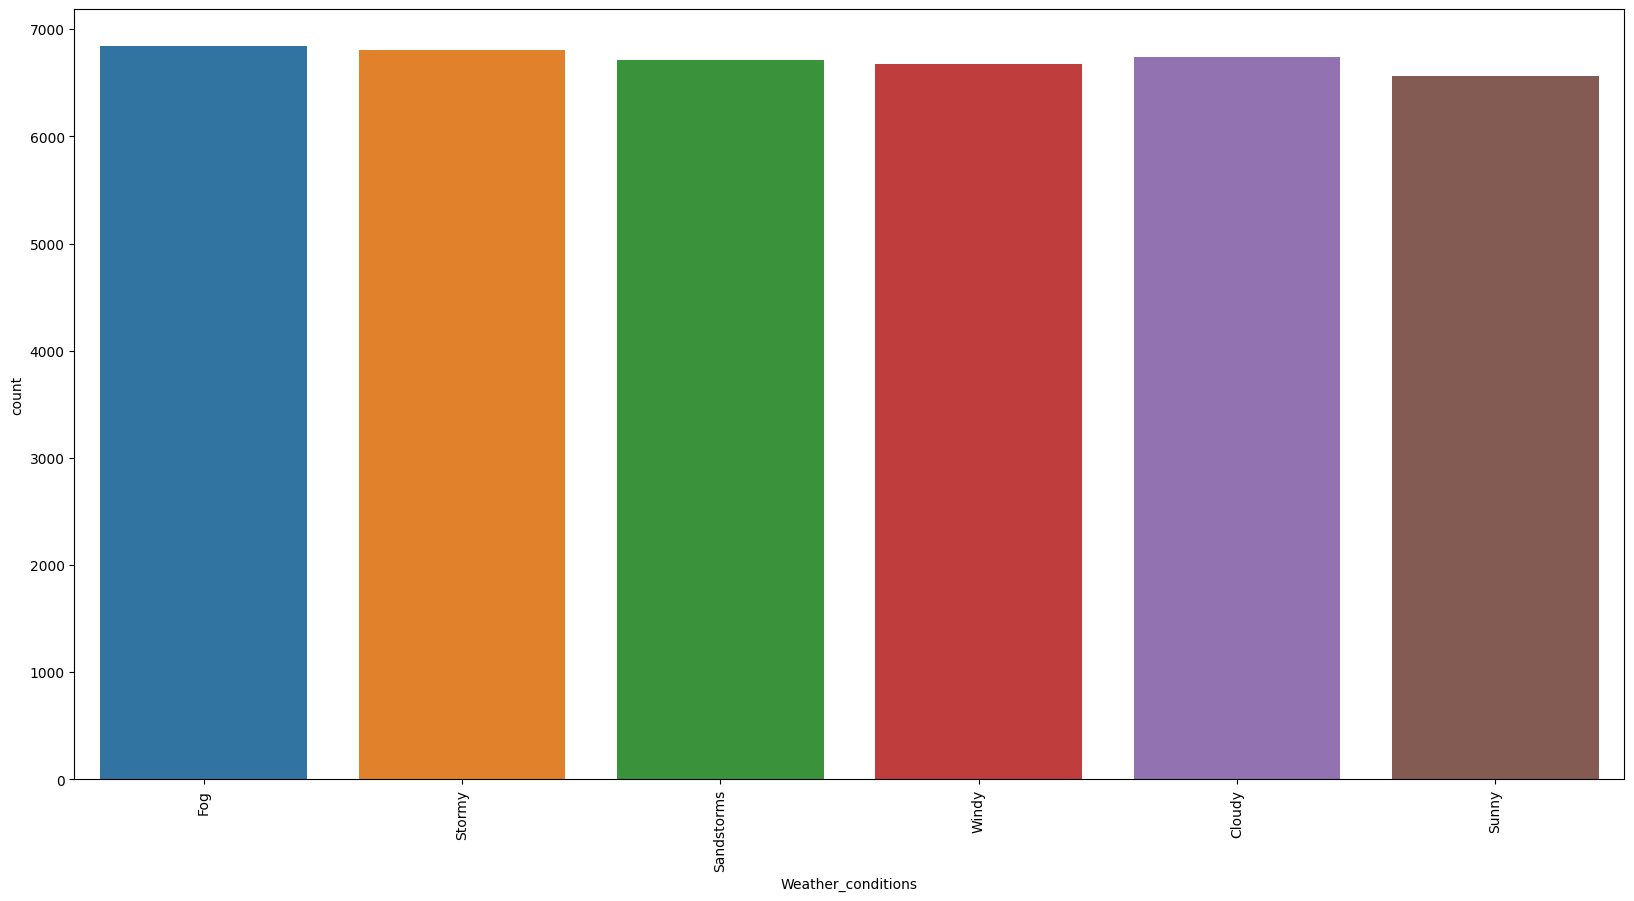

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Weather_conditions'])
plt.xticks(rotation = 'vertical')
plt.show()

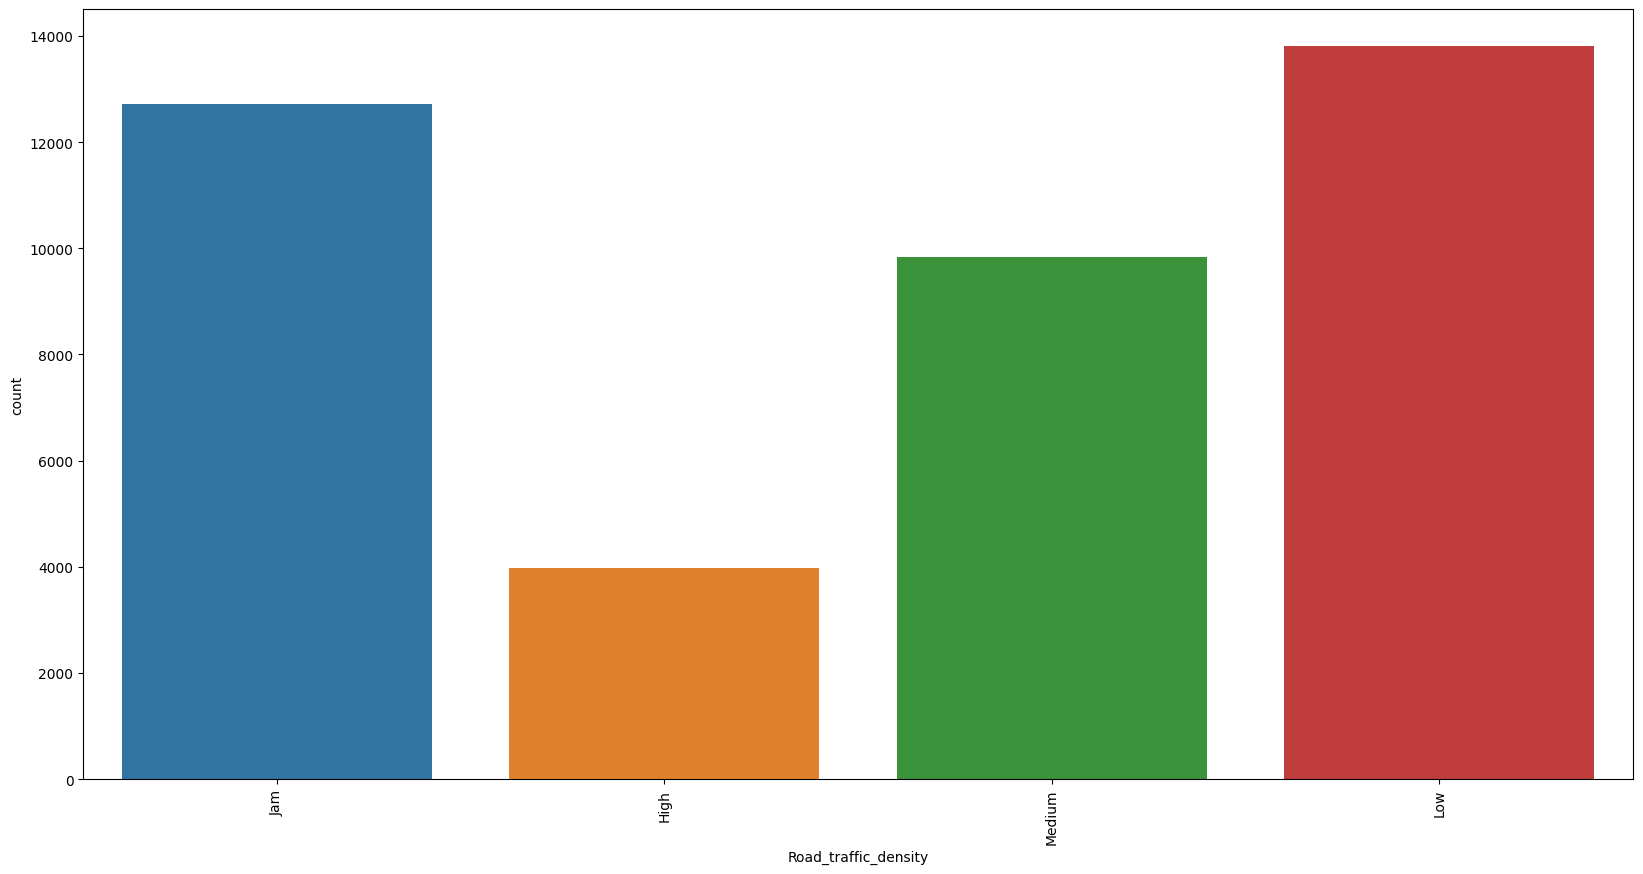

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Road_traffic_density'])
plt.xticks(rotation = 'vertical')
plt.show()

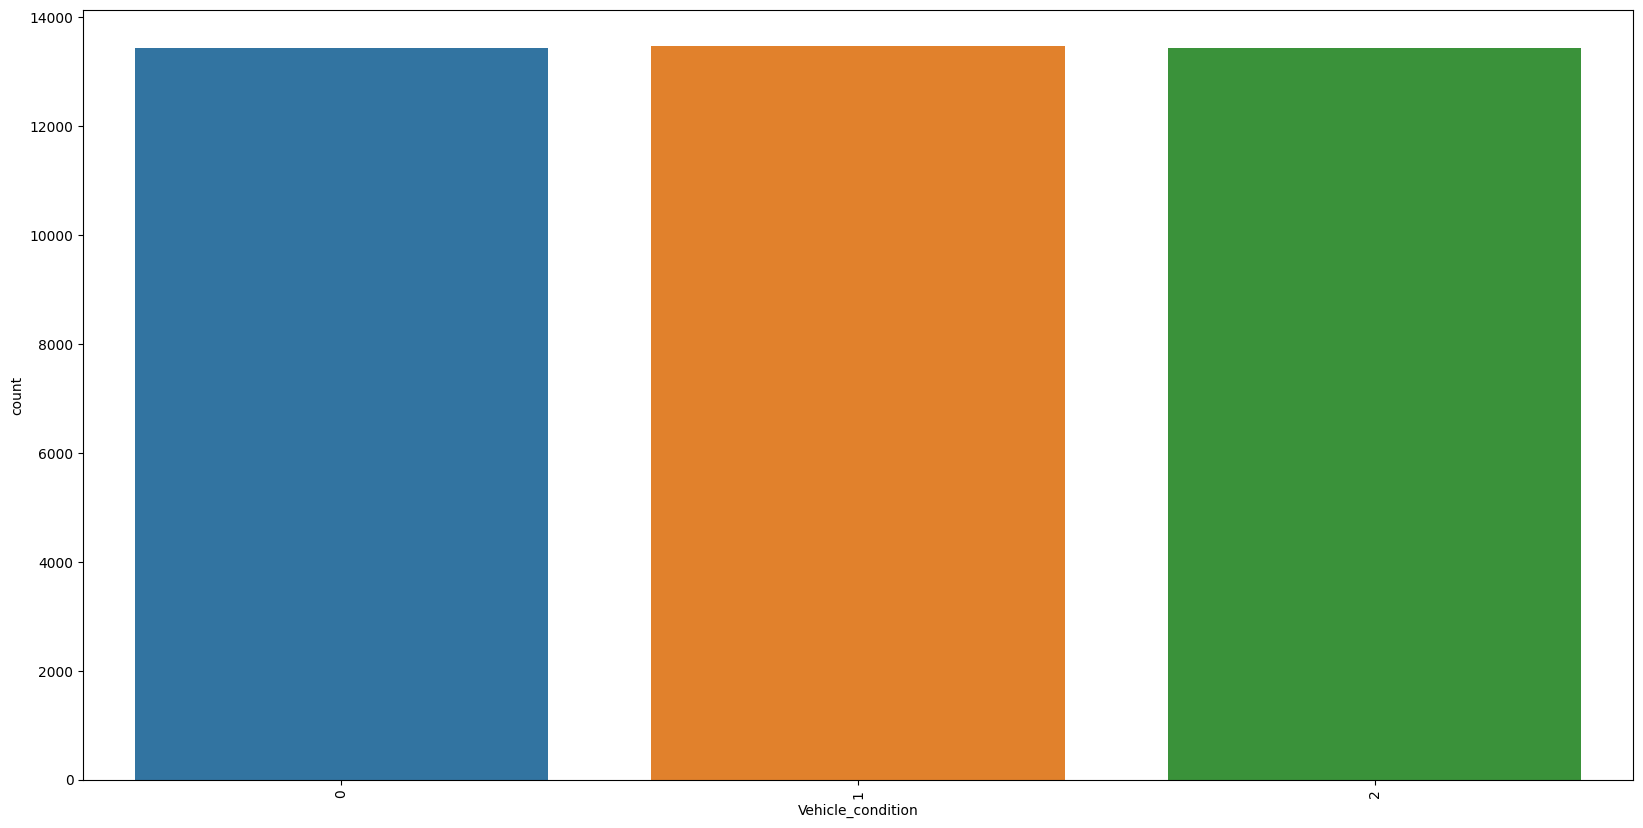

In [73]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Vehicle_condition'])
plt.xticks(rotation = 'vertical')
plt.show()

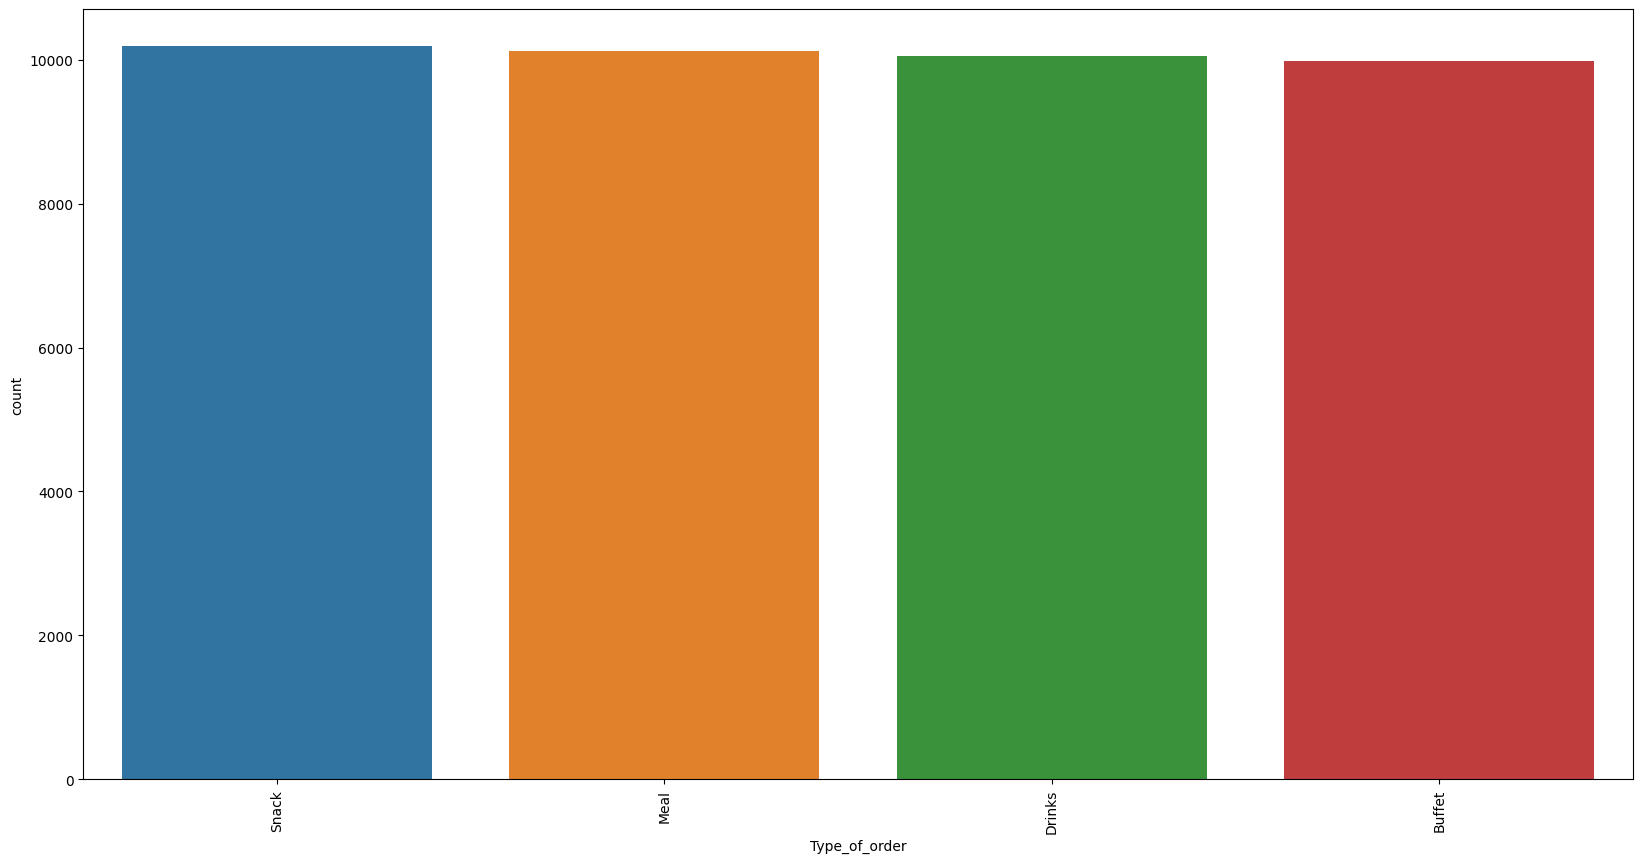

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Type_of_order'])
plt.xticks(rotation = 'vertical')
plt.show()

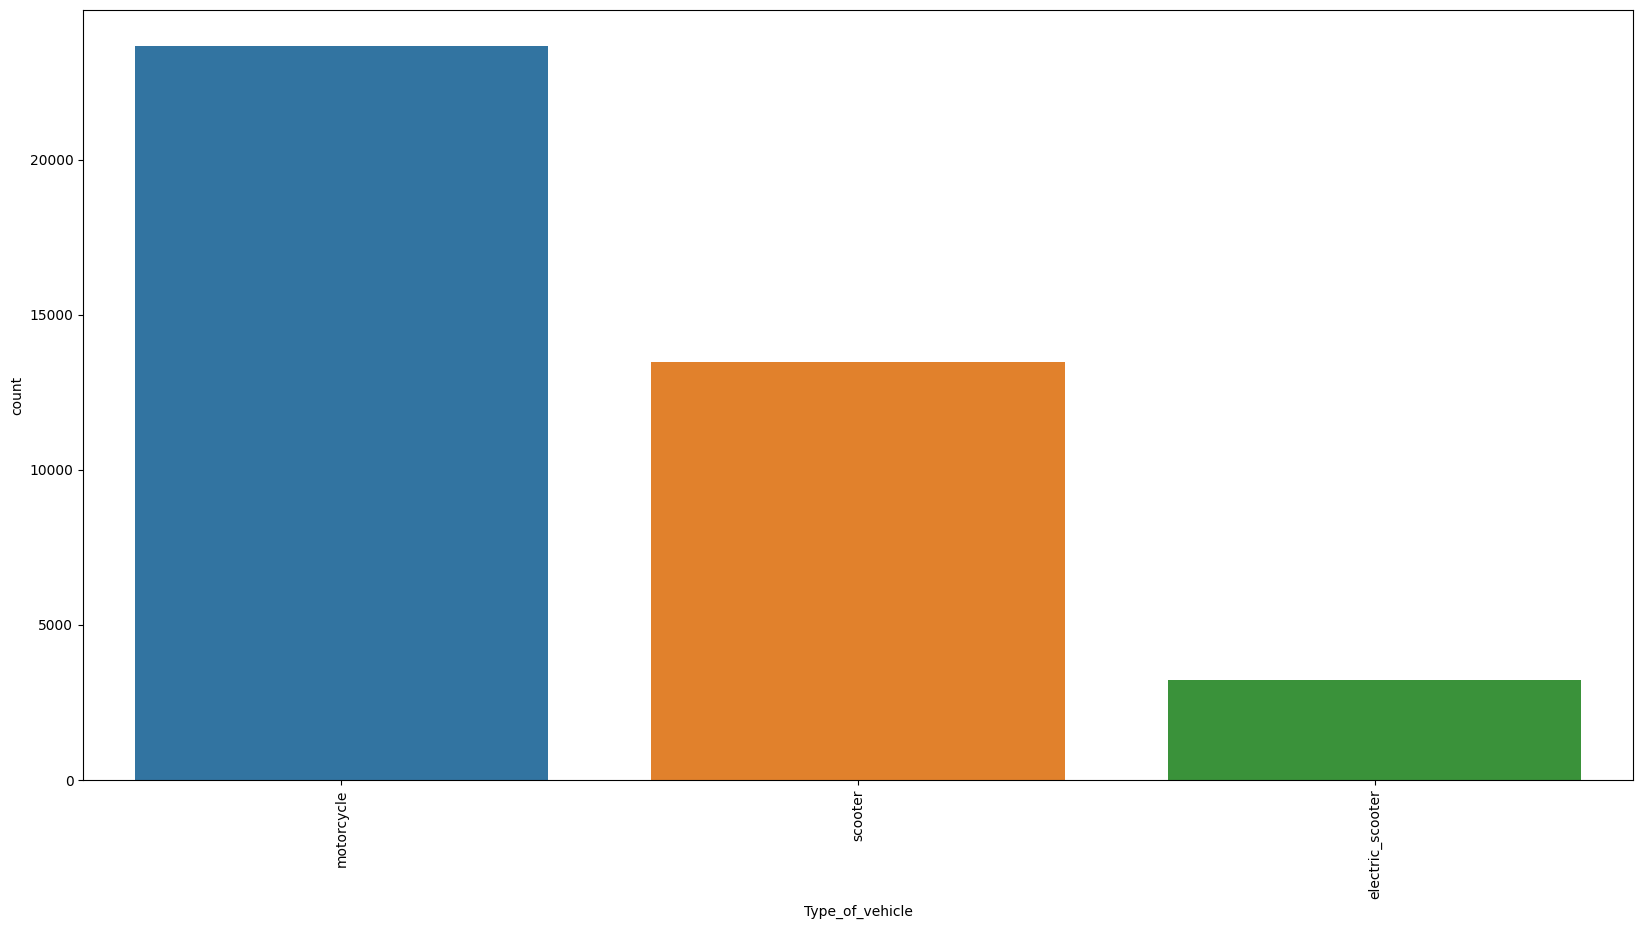

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Type_of_vehicle'])
plt.xticks(rotation = 'vertical')
plt.show()

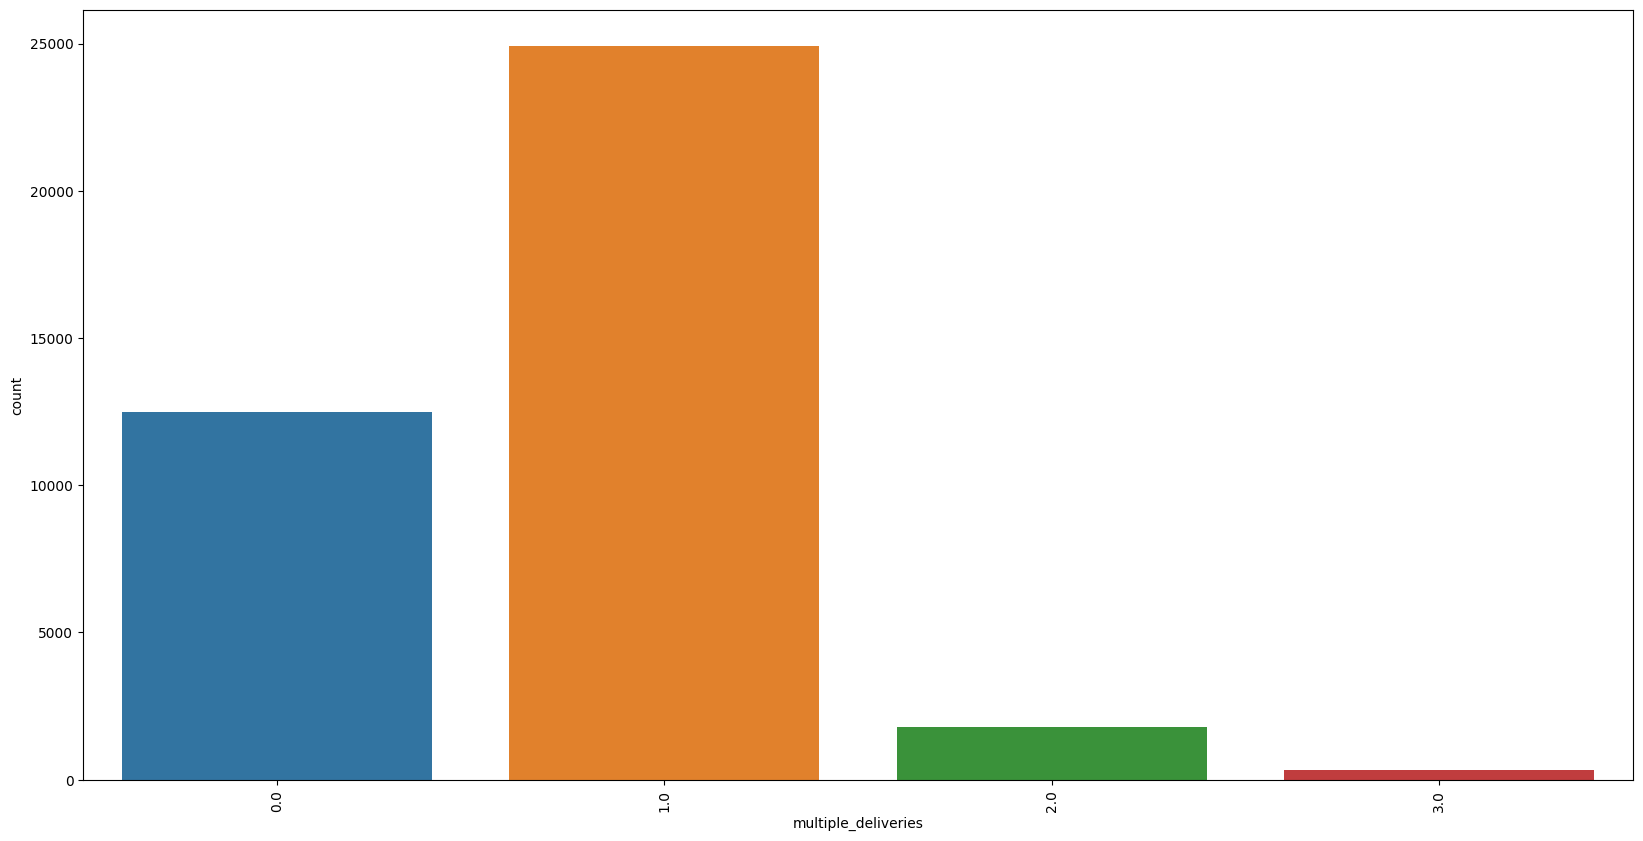

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['multiple_deliveries'])
plt.xticks(rotation = 'vertical')
plt.show()

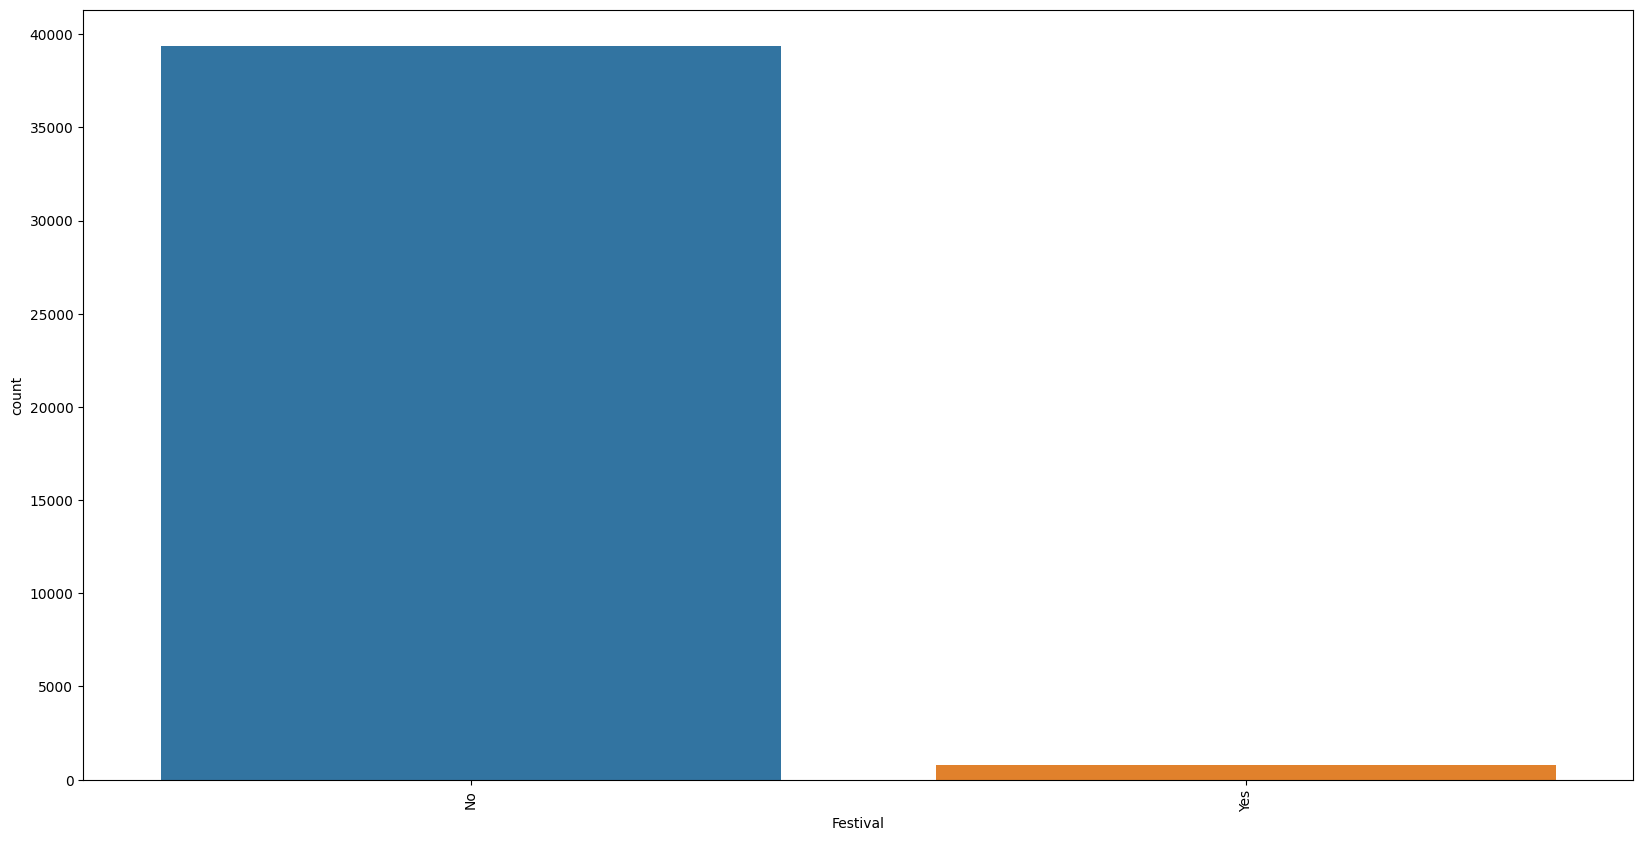

In [77]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Festival'])
plt.xticks(rotation = 'vertical')
plt.show()

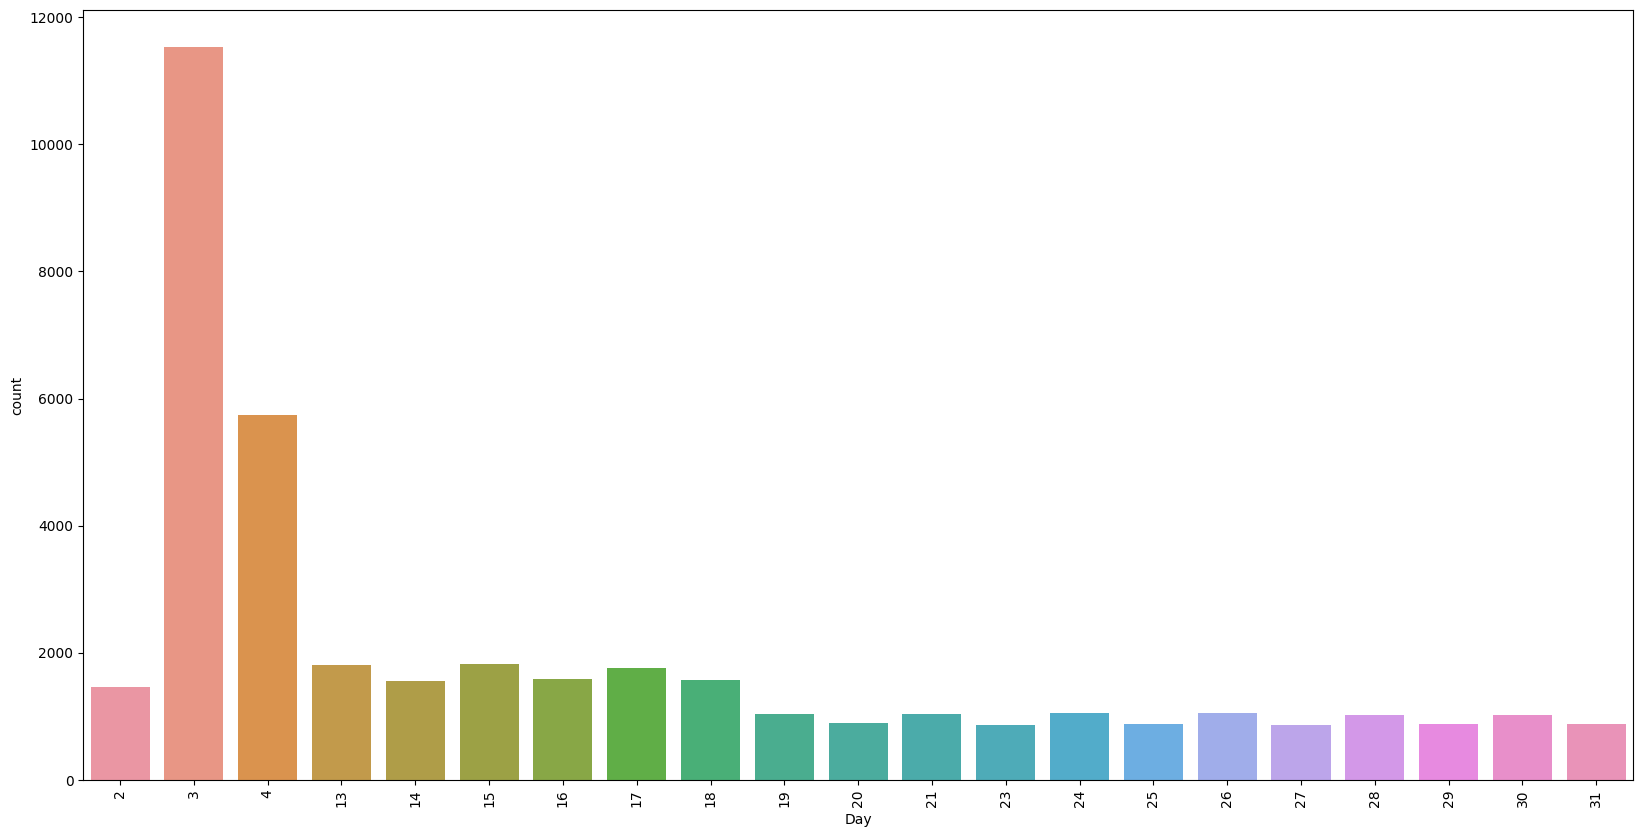

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(df , x=df['Day'])
plt.xticks(rotation = 'vertical')
plt.show()

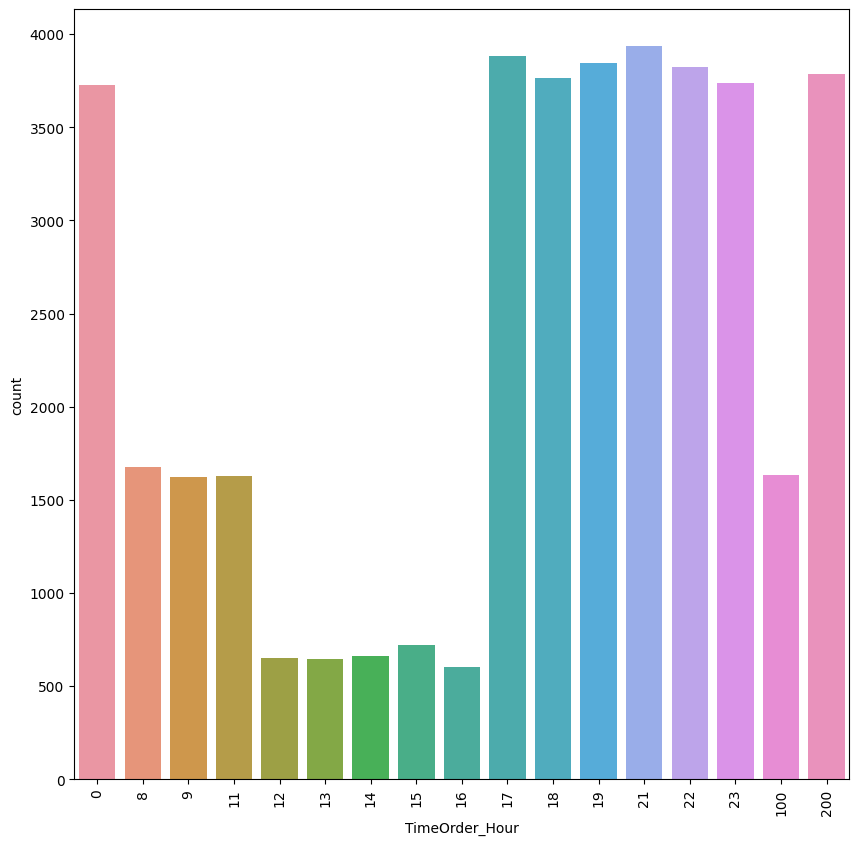

In [79]:
plt.figure(figsize=(10,10))
sns.countplot(df , x=df['TimeOrder_Hour'])
plt.xticks(rotation = 'vertical')
plt.show()

In [80]:
# more no. of order is b/w 8 -11 and eveing 5 to night 12
# people more ofter deliver food in the evening and morning time
df.groupby(['Delivery_city']).median().reset_index()

Delivery_city  Delivery_person_Age  Delivery_person_Ratings  \
0            AGR                 29.0                      4.7   
1            ALH                 30.0                      4.7   
2           AURG                 30.0                      4.7   
3           BANG                 30.0                      4.7   
4            BHP                 30.0                      4.7   
5           CHEN                 30.0                      4.7   
6          COIMB                 30.0                      4.7   
7            DEH                 30.0                      4.7   
8            GOA                 30.0                      4.7   
9            HYD                 30.0                      4.7   
10          INDO                 30.0                      4.7   
11           JAP                 30.0                      4.7   
12           KNP                 29.0                      4.7   
13           KOC                 30.0                      4.7   
14           KOL                 30.0                      4.7   
15          LUDH                 30.0                      4.7   
16           MUM                 29.0                      4.7   
17           MYS                 30.0                      4.7   
18          PUNE                 29.0                      4.7   
19        RANCHI                 30.0                      4.7   
20           SUR                 29.0                      4.7   
21           VAD                 29.0                      4.7   

    Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0             27.161694             78.042990                   27.231850   
1             25.451646             81.834502                   25.519872   
2             19.876106             75.340775                   19.935337   
3             12.970221             77.640489                   13.015662   
4             23.232357             77.429845                   23.291943   
5             13.044694             80.242439                   13.096438   
6             11.010375             76.976494                   11.071278   
7             30.342509             78.061187                   30.411281   
8             15.544419             73.766668                   15.589600   
9             17.431477             78.400350                   17.498263   
10            22.745049             75.887648                   22.800040   
11            26.905190             75.797282                   26.963987   
12            26.474986             80.320708                   26.542001   
13             9.985697             76.296783                   10.053064   
14            22.538999             88.365507                   22.601084   
15            30.893244             75.821817                   30.959584   
16            19.121999             72.834715                   19.185831   
17            12.323194             76.627961                   12.377978   
18            18.546258             73.842527                   18.609299   
19            23.359113             85.325447                   23.424422   
20            21.171060             72.789292                   21.229834   
21            22.310526             73.167788                   22.371603   

    Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
0                     78.100165                1.0                  1.0   
1                     81.904492                1.0                  1.0   
2                     75.402353                1.0                  1.0   
3                     77.695396                1.0                  1.0   
4                     77.479399                1.0                  1.0   
5                     80.299982                1.0                  1.0   
6                     77.037003                1.0                  1.0   
7                     78.126106                1.0                  1.0   
8                     73.838172      

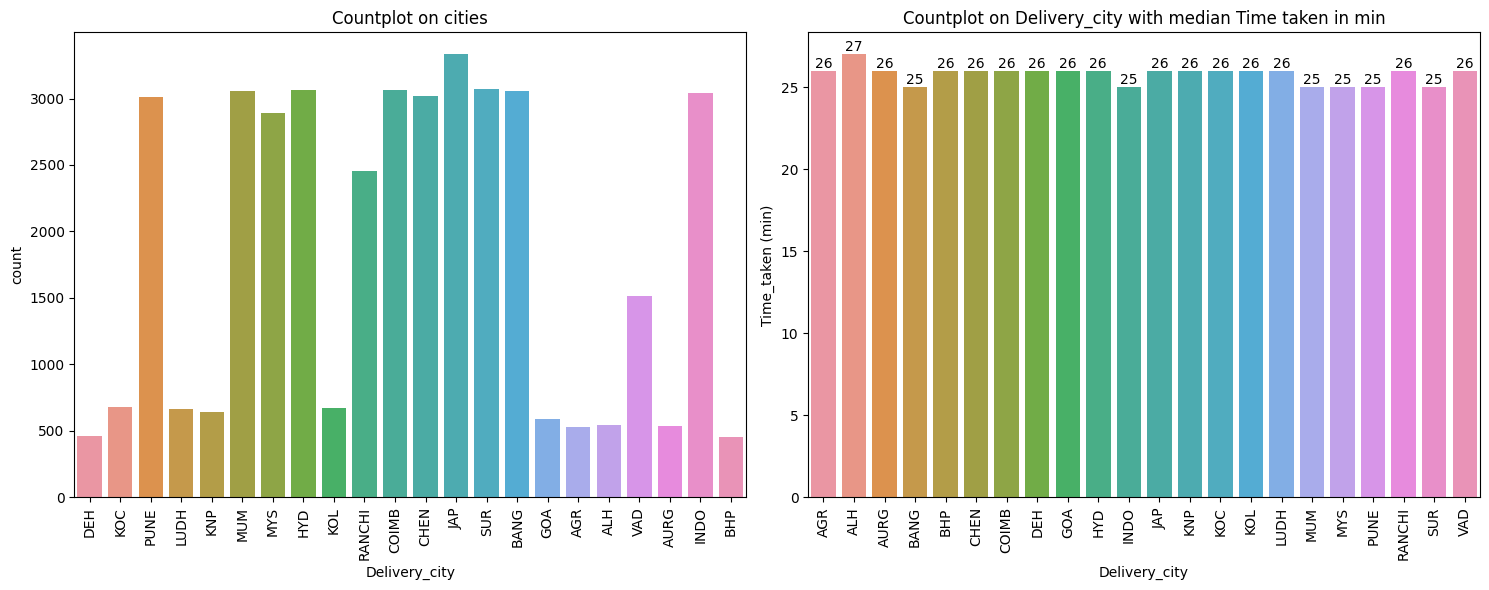

In [81]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df['Delivery_city'])
plt.title("Countplot on cities")
plt.xticks(rotation = 'vertical')

plt.subplot(1,2,2)
data1 = df.groupby(['Delivery_city']).median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Delivery_city with median Time taken in min')
plt.xticks(rotation = 'vertical')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

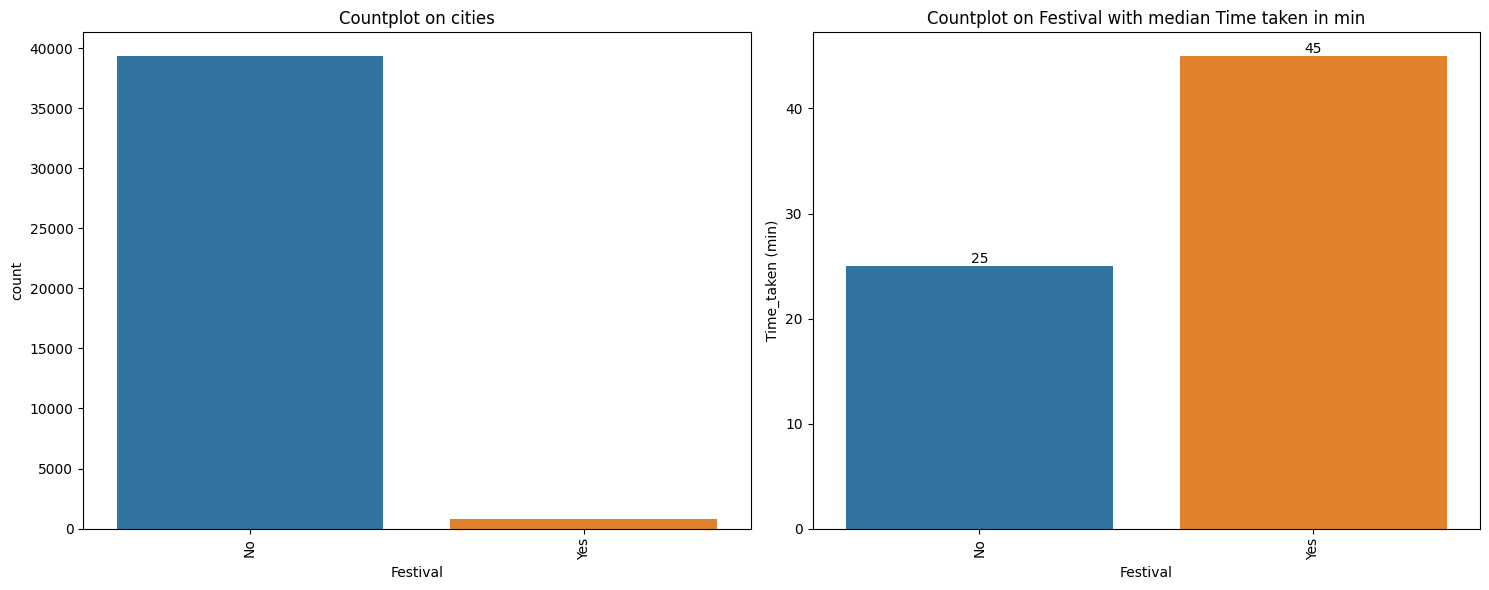

In [82]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df['Festival'])
plt.title("Countplot on cities")
plt.xticks(rotation = 'vertical')

plt.subplot(1,2,2)
data1 = df.groupby(['Festival']).median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')
plt.xticks(rotation = 'vertical')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [83]:
numrical_feature = df.select_dtypes(exclude= 'object').columns.to_list()
numrical_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'Year',
 'Month',
 'Day',
 'TimeOrder_Hour',
 'TimeOrder_Min',
 'Time_Order_picked_hour',
 'Time_Order_picked_min',
 'Distance']

In [84]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             200
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
Year                              0
Month                             0
Day                               0
TimeOrder_Hour                    0
TimeOrder_Min                     0
Time_Order_picked_hour            0
Time_Order_picked_min             0
Delivery_city                     0
Distance                          0
dtype: int64

In [85]:
#Drop Delivery_person_ID column
df.drop(columns=['Delivery_person_ID'] ,inplace=True)

In [86]:
#Drop Time_Order_picked and Time_Orderd
df.drop(columns=['Time_Order_picked' ] ,inplace=True)

In [87]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Year', 'Month', 'Day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'Time_Order_picked_hour', 'Time_Order_picked_min',
       'Delivery_city', 'Distance'],
      dtype='object')

In [88]:
df.shape

(40344, 24)

In [89]:
#Drop Unnecessory columns
df.drop(columns=['Restaurant_latitude' ,'Restaurant_longitude' ,'Delivery_location_latitude' ,'Delivery_location_longitude' ,'Year' ,'Month' ,'Day' ,'TimeOrder_Min' ,'Time_Order_picked_hour' ,'Time_Order_picked_min'] ,axis=1 ,inplace=True)

In [90]:
df.head()

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
0                 36.0                      4.2                Fog   
1                 21.0                      4.7             Stormy   
2                 23.0                      4.7         Sandstorms   
3                 34.0                      4.3         Sandstorms   
4                 24.0                      4.7                Fog   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
0                  Jam                  2         Snack      motorcycle   
1                 High                  1          Meal      motorcycle   
2               Medium                  1        Drinks         scooter   
3                  Low                  0        Buffet      motorcycle   
4                  Jam                  1         Snack         scooter   

   multiple_deliveries Festival           City  Time_taken (min)  \
0                  3.0       No  Metropolitian                46   
1                  1.0       No  Metropolitian                23   
2                  1.0       No  Metropolitian                21   
3                  0.0       No  Metropolitian                20   
4                  1.0       No  Metropolitian                41   

   TimeOrder_Hour Delivery_city   Distance  
0              21           DEH  10.280582  
1              14           KOC   6.242319  
2              17          PUNE  13.787860  
3               9          LUDH   2.930258  
4              19           KNP  19.396618

### Split Dataset

In [91]:
x = df.drop(columns=['Time_taken (min)'] ,axis=1)
y = df[['Time_taken (min)']]

In [92]:
num_col = x.select_dtypes(exclude= 'object').columns.to_list()
cat_col = x.select_dtypes(include= 'object').columns.to_list()

In [93]:
df[df['Road_traffic_density'] == 'Low']

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
3                     34.0                      4.3         Sandstorms   
11                    31.0                      4.7         Sandstorms   
12                    37.0                      5.0         Sandstorms   
17                    35.0                      4.3             Cloudy   
19                    23.0                      4.8              Windy   
...                    ...                      ...                ...   
45569                 30.0                      4.9              Windy   
45571                 34.0                      4.9         Sandstorms   
45573                 30.0                      4.6             Cloudy   
45575                 37.0                      4.8         Sandstorms   
45581                 30.0                      4.9             Cloudy   

      Road_traffic_density  Vehicle_condition Type_of_order   Type_of_vehicle  \
3                      Low                  0        Buffet        motorcycle   
11                     Low                  2          Meal  electric_scooter   
12                     Low                  1         Snack        motorcycle   
17                     Low                  1        Drinks           scooter   
19                     Low                  2        Buffet  electric_scooter   
...                    ...                ...           ...               ...   
45569                  Low                  1         Snack        motorcycle   
45571                  Low                  1         Snack           scooter   
45573                  Low                  0          Meal        motorcycle   
45575                  Low                  2        Drinks  electric_scooter   
45581                  Low                  1        Drinks           scooter   

       multiple_deliveries Festival           City  Time_taken (min)  \
3                      0.0       No  Metropolitian                20   
11                     0.0       No  Metropolitian                26   
12                     1.0       No  Metropolitian                20   
17                     0.0       No  Metropolitian                38   
19                     0.0       No          Urban                12   
...                    ...      ...            ...               ...   
45569                  1.0       No  Metropolitian                26   
45571                  1.0       No            NaN                26   
45573                  0.0       No  Metropolitian                20   
45575                  0.0       No  Metropolitian                20   
45581                  0.0       No  Metropolitian                16   

       TimeOrder_Hour Delivery_city   Distance  
3                   9          LUDH   2.930258  
11                 22        RANCHI  19.618739  
12                  8         COIMB   1.558132  
17                 23           SUR  13.682045  
19                 23          PUNE  16.853619  
...               ...           ...        ...  
45569             100         COIMB   3.116127  
45571               9           MYS   3.109134  
45573               0          PUNE   3.064267  
45575               9          CHEN   3.104827  
45581              23          CHEN   4.657195  

[13815 rows x 14 columns]

##### If traffic density is LOW our delivery person will easily deliver food and take less time
##### Also that person will easily deliver food if weather condition is SUNNY
##### WE have to convert them with the help of ordinalencoder
##### for remaining column we can use any other encoder as order is not matter

In [94]:
road_traffic = ['Low' ,'Medium' ,'High' ,'Jam']
weather_cond = ['Sunny' ,'Cloudy' ,'Windy' ,'Fog' ,'Sandstorms' ,'Stormy']

num_col


['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'TimeOrder_Hour',
 'Distance']

In [95]:
nominal_encodeing_col = ['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city'] 
ordinal_encoding_col = ['Weather_conditions','Road_traffic_density']
numerical_col = num_col
nominal_encodeing_col 
numerical_col


['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'TimeOrder_Hour',
 'Distance']

In [96]:
#Define Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
#numerical_pipeline

numerical_pipeline = Pipeline(
    steps=[
        ('imputer' ,SimpleImputer(strategy='constant',fill_value=0) ),
        ('scalar' ,StandardScaler(with_mean=False))
    ]
)



#Categorical Pipeline for ordinal data column
ordinal_pipeline = Pipeline(
    steps=[
        ('imputer' ,SimpleImputer(strategy='most_frequent')),
        ('encoder' ,OrdinalEncoder(categories=[weather_cond ,road_traffic])),
        ('scalar' ,StandardScaler(with_mean=False))
    ]
)



#Categorical Pipeline for nominal data column
nominal_pipeline = Pipeline(
    steps=[
        ('imputer' ,SimpleImputer(strategy='most_frequent')),
        ('encoder' ,OneHotEncoder(handle_unknown='ignore')),
        ('scalar' ,StandardScaler(with_mean=False))
    ]
)

In [98]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline' , numerical_pipeline ,numerical_col),
    ('nominal_pipeline' ,nominal_pipeline ,nominal_encodeing_col),
    ('categorical_pipeline' , ordinal_pipeline ,ordinal_encoding_col)
])

In [99]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'TimeOrder_Hour', 'Delivery_city', 'Distance'],
      dtype='object')

In [100]:
df['multiple_deliveries'].unique()

array([ 3.,  1.,  0., nan,  2.])

In [101]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
x_train = preprocessor.fit_transform(x_train)
x_test =preprocessor.transform(x_test)

In [112]:
x_test.shape

(8069, 42)

#### Defining Model

In [103]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error ,mean_squared_error


In [104]:
def evaluate(true , predicted):
    r2 = r2_score(true ,predicted)
    MAE =mean_absolute_error(true ,predicted )
    MSE =mean_squared_error(true ,predicted )
    rmse =np.sqrt(MSE)
    
    return r2 ,MAE ,MSE ,rmse



In [105]:
models ={
    'linerar regression':LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'ElasticNet' : ElasticNet(),
    'Random Forest' : RandomForestRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'SVR' : SVR(),
    'GradientBoostRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

train_r2_list =[]
train_MAE_list = []
train_MSE_list = []
train_rmse_list = []
train_model_list= []

test_r2_list =[]
test_MAE_list = []
test_MSE_list = []
test_rmse_list = []
test_model_list= []


In [106]:
for i in range(len(list(models.values()))):
    model = list(models.values())[i]
    #train model
    model.fit(x_train ,y_train)  
    
    
    #predict output
    y_train_pred = model.predict(x_train )
    y_test_pred = model.predict(x_test )
    
    
    #Evaluate Model on test data
    r2_test ,mae_test ,mse_test ,rmse_test =evaluate(y_test_pred ,y_test)
    
    #Evaluate Model on train data
    r2_train ,mae_train ,mse_train ,rmse_train =evaluate(y_train_pred ,y_train)
    
    
    
    
    #create list from train model 
    train_model_list.append(list(models.keys())[i])
    
    #create list from r2_score for train data
    train_r2_list.append(r2_train)
    
    #create list from mae_train for train data
    train_MAE_list.append(mae_train)
    
    #create list from mse_train for train data
    train_MSE_list.append(mse_train)
    
    #create list from rmse_train for train data
    train_rmse_list.append(rmse_train)
    
    
    
    
    
    #create list from test model 
    test_model_list.append(list(models.keys())[i])
    
    #create list from r2_score for test data
    test_r2_list.append(r2_test)
    
    #create list from mae_train for test data
    test_MAE_list.append(mae_test)
    
    #create list from mse_train for test data
    test_MSE_list.append(mse_test)
    
    #create list from rmse_train for test data
    test_rmse_list.append(rmse_test)
    
    
    
    
    
    
    print(f'Model Performance on train Data for model {list(models.keys())[i]}')
    print(f"R2_score for model {r2_train}")
    print(f"MAE of train data {mae_train}")
    print(f"MSE of train data {mse_train}")
    print(f"RMSE of train data {rmse_train}")
    
    print(35*"*")
    
    print(f'Model Performance on test Data for model {list(models.keys())[i]}')
    print(f"R2_score for model {r2}")
    print(f"MAE of train data {mae}")
    print(f"MSE of train data {mse}")
    print(f"RMSE of train data {rmse}")
    
    print(35*"*")
    print(35*"*")
    print('\n')
    print('\n')
    
    
    
    
    

Model Performance on train Data for model linerar regression
R2_score for model 0.1455453182983717
MAE of train data 5.0383598591208365
MSE of train data 40.30542863743883
RMSE of train data 6.348655655919513
***********************************
Model Performance on test Data for model linerar regression


NameError: name 'r2' is not defined

In [ ]:
Train_df = pd.DataFrame(
    {'Model_Name':train_model_list,
    "Train_R2_score":train_r2_list,
    'Train_MAE':train_MAE_list,
    'Train_MSE':train_MSE_list,
    'Train_RMSE':train_rmse_list
    }
)

Test_df = pd.DataFrame(
    {
        'Model_Name':test_model_list,
        'Test_R2_score':test_r2_list,
        'Test_MAE':test_MAE_list,
        'Test_MSE':test_MSE_list,
        'Test_RMSE':test_rmse_list
    }
)

In [ ]:
Train_df

Model_Name  Train_R2_score  Train_MAE  Train_MSE  Train_RMSE
0      linerar regression        0.145545   5.038360  40.305429    6.348656
1                   Lasso       -1.158822   5.449047  46.455910    6.815857
2                   Ridge        0.145495   5.038338  40.305025    6.348624
3              ElasticNet       -1.439536   5.501711  46.872030    6.846315
4           Random Forest        0.973429   1.147807   2.110438    1.452735
5   DecisionTreeRegressor        1.000000   0.000000   0.000000    0.000000
6                     SVR        0.147674   4.894194  38.746811    6.224694
7  GradientBoostRegressor        0.698508   3.515617  19.233946    4.385652
8            XGBRegressor        0.851570   2.639025  10.871468    3.297191

In [ ]:
Test_df

Model_Name  Test_R2_score  Test_MAE   Test_MSE  Test_RMSE
0      linerar regression       0.113513  5.132537  41.507874   6.442660
1                   Lasso      -1.230660  5.545679  47.798233   6.913627
2                   Ridge       0.113318  5.132762  41.512615   6.443028
3              ElasticNet      -1.517000  5.590869  48.208792   6.943255
4           Random Forest       0.795725  3.131610  15.298876   3.911378
5   DecisionTreeRegressor       0.684088  4.048705  27.901971   5.282232
6                     SVR       0.107609  5.003171  39.930366   6.319048
7  GradientBoostRegressor       0.681635  3.577222  19.987838   4.470776
8            XGBRegressor       0.788968  3.139117  15.298211   3.911293

## Best Model  
### random forest with 82% accuracy

In [ ]:

print("Food Delivery Time Prediction")
# a = int(input("Age of Delivery Partner: "))
# b = float(input("Ratings of Previous Deliveries: "))
# c = int(input("Total Distance: "))

a=25
b=4.3
c=12

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction


ValueError: X has 3 features, but LinearRegression is expecting 42 features as input.

In [ ]:
x_train[0].size


42